In [4]:
!pip3 install psycopg2-binary


In [8]:
import psycopg2

conn = psycopg2.connect(
    dbname="postgres",
    user="postgres",
    password="rocky1234",
    host="jrvs-psql",
    port="5432"  # default PostgreSQL port
)


In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode


query = "SELECT * FROM retail;"  # Replace `retail` with your table name
retail_df = pd.read_sql(query, conn)
filtered_retail_df = pd.DataFrame(retail_df[(retail_df["quantity"] >= 0) & (retail_df["unit_price"] >= 0)])
df=pd.DataFrame(filtered_retail_df)

pd.options.display.max_columns = 25


In [201]:
print(df.head())


  invoice_no stock_code                          description  quantity        invoice_date  unit_price  customer_id         country
0     489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12 2009-12-01 07:45:00        6.95      13085.0  United Kingdom
1     489434     79323P                   PINK CHERRY LIGHTS        12 2009-12-01 07:45:00        6.75      13085.0  United Kingdom
2     489434     79323W                  WHITE CHERRY LIGHTS        12 2009-12-01 07:45:00        6.75      13085.0  United Kingdom
3     489434      22041         RECORD FRAME 7" SINGLE SIZE         48 2009-12-01 07:45:00        2.10      13085.0  United Kingdom
4     489434      21232       STRAWBERRY CERAMIC TRINKET BOX        24 2009-12-01 07:45:00        1.25      13085.0  United Kingdom


In [202]:
print(df.sample(10))


       invoice_no stock_code                         description  quantity        invoice_date  unit_price  customer_id         country
111058     500014      21910                 WAY OUT METAL SIGN         12 2010-03-04 10:29:00        1.65      15622.0  United Kingdom
487128     534870      21807     WHITE CHRISTMAS STAR DECORATION         1 2010-11-24 14:29:00        0.42      17601.0  United Kingdom
745461     556111     84536B        FAIRY CAKES NOTEBOOK A7 SIZE        16 2011-06-09 09:16:00        0.42      13004.0  United Kingdom
996352     576618      23114       VINTAGE LEAF CHOPPING BOARD           1 2011-11-15 17:00:00       10.79          NaN  United Kingdom
120084     500872     84970L    SINGLE HEART ZINC T-LIGHT HOLDER         4 2010-03-10 13:34:00        0.95      13668.0  United Kingdom
54187      494378      21759    METAL WALL SHELF UNIT WITH HOOKS         2 2010-01-13 17:03:00      102.13          NaN  United Kingdom
475138     534155      20970  PINK FLORAL FELTCR

In [10]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   invoice_no    1067371 non-null  object        
 1   stock_code    1067371 non-null  object        
 2   description   1062989 non-null  object        
 3   quantity      1067371 non-null  int64         
 4   invoice_date  1067371 non-null  datetime64[ns]
 5   unit_price    1067371 non-null  float64       
 6   customer_id   824364 non-null   float64       
 7   country       1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB
None


In [74]:
print(df.describe())


           quantity    unit_price    customer_id
count  1.067371e+06  1.067371e+06  824364.000000
mean   9.938898e+00  4.649388e+00   15324.638504
std    1.727058e+02  1.235531e+02    1697.464450
min   -8.099500e+04 -5.359440e+04   12346.000000
25%    1.000000e+00  1.250000e+00   13975.000000
50%    3.000000e+00  2.100000e+00   15255.000000
75%    1.000000e+01  4.150000e+00   16797.000000
max    8.099500e+04  3.897000e+04   18287.000000


Minimum Amount: 0.19
Maximum Amount: 168469.6
Median Amount: 304.32
Mean Amount: 523.3
Mode Amount: 15.0


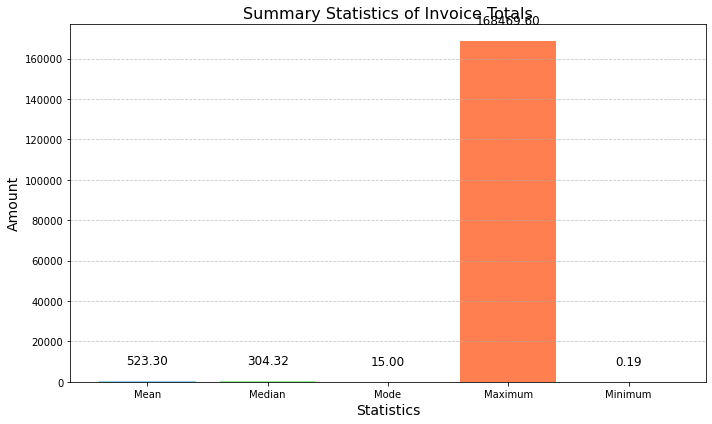

In [57]:
# Invoice total
df['Invoice_amount'] = df['quantity'] * df['unit_price']
filtered_df = df[df['Invoice_amount'] > 0]
invoice_totals = filtered_df.groupby('invoice_no')['Invoice_amount'].sum()
invoice_totals = invoice_totals.rename('InvoiceSum')


#filtered_df['invoice_totals'] = filtered_df['invoice_no'].map(invoice_totals)

#summed_data = pd.DataFrame(df.groupby('invoice_no')['Total_Invoice'].sum())


min_amount = invoice_totals.min()

max_amount = invoice_totals.max()
median_amount = invoice_totals.median()
mean_amount = invoice_totals.mean()
mode_amount = invoice_totals.mode()[0]
print('Minimum Amount:', min_amount)
print('Maximum Amount:', max_amount)
print('Median Amount:', np.round(median_amount,2))
print('Mean Amount:', np.round(mean_amount,2))
print('Mode Amount:', mode_amount)


#print(summed_data.max())
#min_val = df['invoice_totals'].min(skipna=True)
#print(min_val)
df['month'] = df['invoice_date'].dt.to_period('M')

statistics = {
    'Mean': mean_amount,
    'Median': median_amount,
    'Mode': mode_amount,
    'Maximum': max_amount,
    'Minimum': min_amount
}

# Convert statistics to lists for plotting
labels = list(statistics.keys())
values = list(statistics.values())

# Plot
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['skyblue', 'lightgreen', 'orange', 'coral', 'violet'])

# Add titles and labels
plt.title('Summary Statistics of Invoice Totals', fontsize=16)
plt.ylabel('Amount', fontsize=14)
plt.xlabel('Statistics', fontsize=14)

# Annotate bars with values
for i, value in enumerate(values):
    plt.text(i, value + 0.05 * max(values), f'{value:.2f}', ha='center', fontsize=12)

# Show grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

In [57]:
!pip install --upgrade pip

Minimum Amount: 0.19
Maximum Amount: 724.25
Median Amount: 256.24
Mean Amount: 271.68
Mode Amount: 15.0


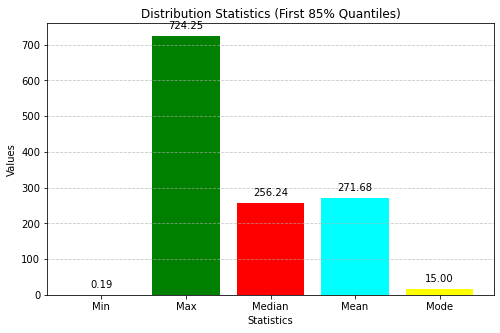

In [78]:
#### Draw the distribution for the first 85 quantiles of the invoice amount data with min, 
#max, median, mod, and mean

# Filter the first 85 quantiles
#filtered_invoice_totals = invoice_totals[invoice_totals.Invoice_amount < invoice_totals.Invoice_amount.quantile(0.85)]


# Filter the first 85 quantiles
filtered_invoice_totals = invoice_totals[invoice_totals < invoice_totals.quantile(0.85)]

# Calculate statistics
min_amount_85 = filtered_invoice_totals.min()
max_amount_85 = filtered_invoice_totals.max()
median_amount_85 = filtered_invoice_totals.median()
mean_amount_85 = filtered_invoice_totals.mean()
mode_85_series = filtered_invoice_totals.mode()
mode_amount_85 = mode_85_series[0] if not mode_85_series.empty else None

# Print statistics
print('Minimum Amount:', min_amount_85)
print('Maximum Amount:', np.round(max_amount_85, 2))
print('Median Amount:', np.round(median_amount_85, 2))
print('Mean Amount:', np.round(mean_amount_85, 2))
print('Mode Amount:', mode_amount_85)

# Data for the bar chart
statistics = ['Min', 'Max', 'Median', 'Mean', 'Mode']
values = [min_amount_85, max_amount_85, median_amount_85, mean_amount_85, mode_amount_85]

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(statistics, values, color=['blue', 'green', 'red', 'cyan', 'yellow'])

# Add labels and title
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.title('Distribution Statistics (First 85% Quantiles)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value annotations on the bars
for i, value in enumerate(values):
    if value is not None:  # Check to avoid errors with None
        plt.text(i, value + (abs(max(values)) * 0.02), f'{value:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()



In [114]:
# 4. monthly placed and cancelled order

placed_df = pd.DataFrame(retail_df)
placed_df["invoice_date"] = pd.to_datetime(placed_df["invoice_date"])

# Extract `yyyymm` format and group by it
placed_df["invoice_month"] = df["invoice_date"].dt.to_period("M").astype(str).str.replace("-", "")

# Group by `invoice_month` and count occurrences
placed_df = placed_df.groupby("invoice_month").size().reset_index(name="count")

# Display the result
#print(placed_df.head())

cancelled_df = retail_df[retail_df["invoice_no"].str.startswith("C")].copy()
cancelled_df["invoice_month"] = cancelled_df["invoice_date"].dt.to_period("M").astype(str).str.replace("-", "")
cancelled_df = cancelled_df.groupby("invoice_month").size().reset_index(name="cancelled_count")

#print(cancelled_df.head())

# Merge placed_df and cancelled_df
merged_df = pd.merge(placed_df, cancelled_df, on="invoice_month", how="outer")

# Replace NaN with 0 for counts
merged_df.fillna(0, inplace=True)

# Display the result
print(merged_df.head())




  invoice_month  count  cancelled_count
0        200912  44123             1015
1        201001  30741              686
2        201002  28365              576
3        201003  40477              844
4        201004  33355              626


  invoice_month  count  cancelled_count
0        200912  44123             1015
1        201001  30741              686
2        201002  28365              576
3        201003  40477              844
4        201004  33355              626


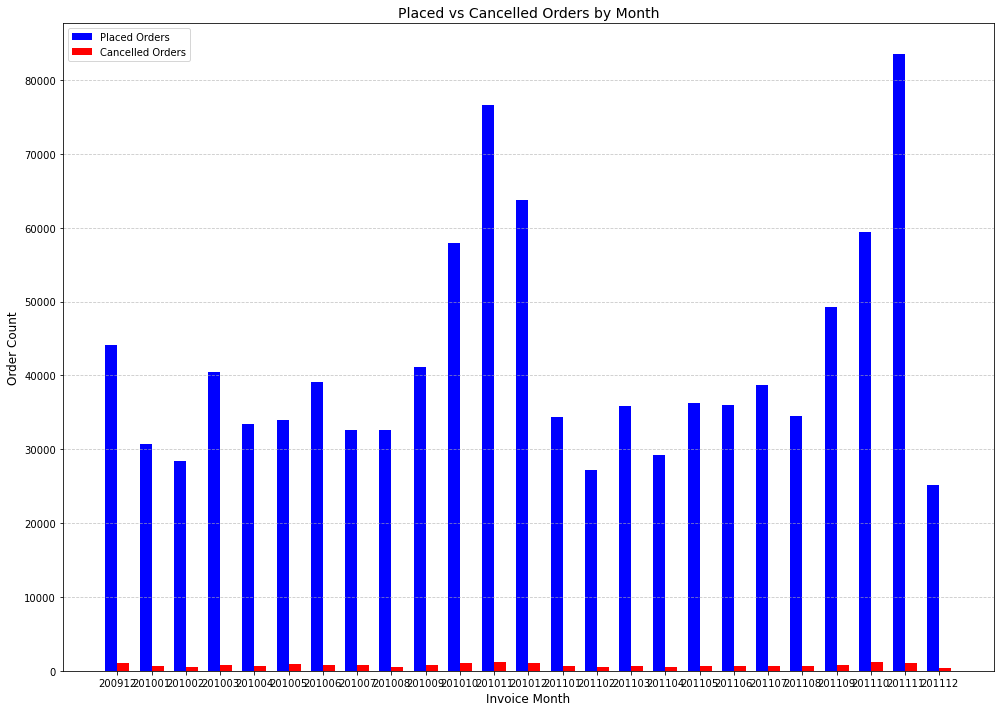

In [115]:
# Plot the data
plt.figure(figsize=(14, 10))

x = merged_df["invoice_month"]
bar_width = 0.35  # Width of the bars
indices = range(len(x))
print(merged_df.head())
# Plot placed and cancelled counts
plt.bar(indices, merged_df["count"], width=bar_width, label="Placed Orders", color="blue")
plt.bar([i + bar_width for i in indices], merged_df["cancelled_count"], width=bar_width, label="Cancelled Orders", color="red")

plt.xlabel("Invoice Month", fontsize=12)
plt.ylabel("Order Count", fontsize=12)
plt.title("Placed vs Cancelled Orders by Month", fontsize=14)
plt.xticks([i + bar_width / 2 for i in indices], x, fontsize=10)  # Set x-tick labels at center
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

   Invoice Month  Total Sales Amount
0         200912          825685.760
1         201001          652708.502
2         201002          553713.306
3         201003          833570.131
4         201004          681528.992
5         201005          659858.860
6         201006          752270.150
7         201007          650712.940
8         201008          697274.910
9         201009          924333.011
10        201010         1165483.910
11        201011         1470272.482
12        201012         1262598.730
13        201101          691364.560
14        201102          523631.890
15        201103          717639.360
16        201104          537808.621
17        201105          770536.020
18        201106          761739.900
19        201107          719221.191
20        201108          759138.420
21        201109         1058590.172
22        201110         1154979.300
23        201111         1509496.330
24        201112          638810.680


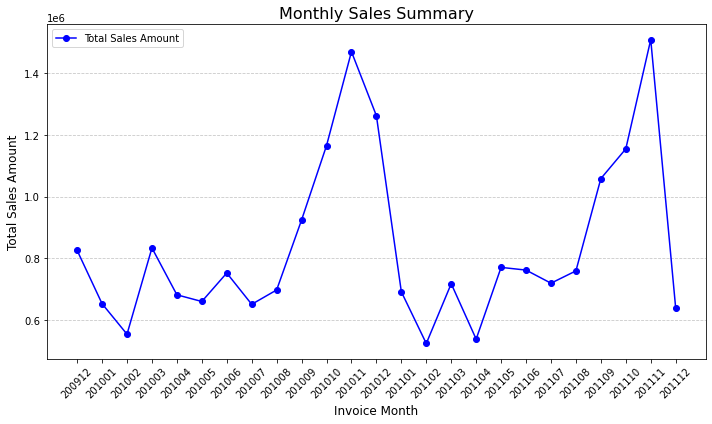

In [123]:
monthly_sales_df = pd.DataFrame(filtered_retail_df)
monthly_sales_df['Total_Amount']=monthly_sales_df['quantity']* monthly_sales_df['unit_price']
monthly_sales_df["invoice_month"] = monthly_sales_df["invoice_date"].dt.to_period("M").astype(str).str.replace("-", "")

monthly_sales_summary = monthly_sales_df.groupby("invoice_month")["Total_Amount"].sum().reset_index()
monthly_sales_summary.columns = ["Invoice Month", "Total Sales Amount"]

print(monthly_sales_summary)

plt.figure(figsize=(10, 6))

# Plot the data
plt.plot(
    monthly_sales_summary["Invoice Month"],
    monthly_sales_summary["Total Sales Amount"],
    marker="o",  # Add markers for each data point
    color="blue",
    label="Total Sales Amount"
)

# Customize the plot
plt.title("Monthly Sales Summary", fontsize=16)
plt.xlabel("Invoice Month", fontsize=12)
plt.ylabel("Total Sales Amount", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10, rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()

#print(monthly_sales_df.head())


  Invoice Month  Total Sales Amount  Growth Percentage
0        200912          825685.760                NaN
1        201001          652708.502         -20.949527
2        201002          553713.306         -15.166831
3        201003          833570.131          50.541828
4        201004          681528.992         -18.239754


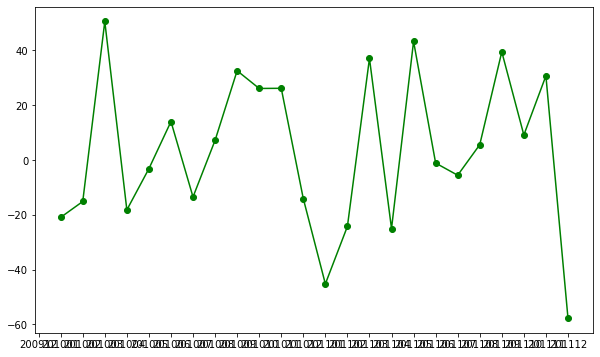

In [130]:
# Monthly Sales Growth
monthly_sales_summary["Growth Percentage"] = (
    monthly_sales_summary["Total Sales Amount"].pct_change() * 100
)
print(monthly_sales_summary.head())

plt.figure(figsize=(10, 6))
plt.plot(
    monthly_sales_summary["Invoice Month"],
    monthly_sales_summary["Growth Percentage"],
    marker="o",  # Add markers for each data point
    color="green",
    label="Growth Percentage"
)

  invoice_no stock_code                          description  quantity  \
0     489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1     489434     79323P                   PINK CHERRY LIGHTS        12   
2     489434     79323W                  WHITE CHERRY LIGHTS        12   
3     489434      22041         RECORD FRAME 7" SINGLE SIZE         48   
4     489434      21232       STRAWBERRY CERAMIC TRINKET BOX        24   

         invoice_date  unit_price  customer_id         country  \
0 2009-12-01 07:45:00        6.95      13085.0  United Kingdom   
1 2009-12-01 07:45:00        6.75      13085.0  United Kingdom   
2 2009-12-01 07:45:00        6.75      13085.0  United Kingdom   
3 2009-12-01 07:45:00        2.10      13085.0  United Kingdom   
4 2009-12-01 07:45:00        1.25      13085.0  United Kingdom   

   Invoice_amount  Total_Amount invoice_month  
0            83.4          83.4        200912  
1            81.0          81.0        200912  
2            8

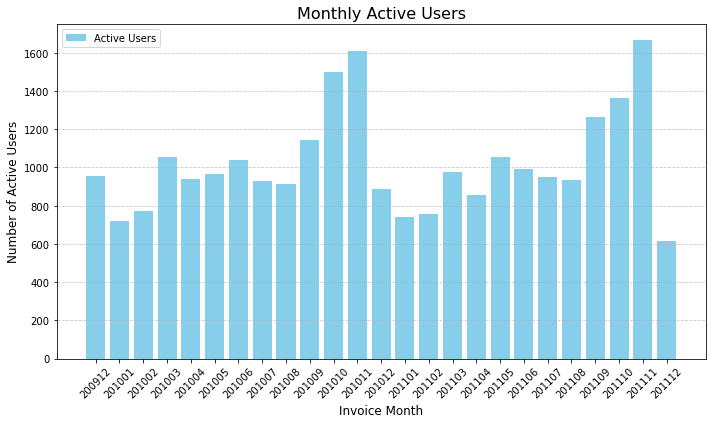

In [143]:
# Monthly Active Users
monthly_sales_df = pd.DataFrame(filtered_retail_df)
print(monthly_sales_df.head())

monthly_sales_df["invoice_month"] = (
    monthly_sales_df["invoice_date"].dt.to_period("M").astype(str).str.replace("-", "")
)

monthly_active_users = (
    monthly_sales_df.groupby("invoice_month")["customer_id"].nunique().reset_index()
)
monthly_active_users.columns = ["Invoice Month", "Active Users"]
print(monthly_active_users)

plt.figure(figsize=(10, 6))
plt.bar(
    monthly_active_users["Invoice Month"],
    monthly_active_users["Active Users"],
    color="skyblue",
    label="Active Users"
)

# Customize the plot
plt.title("Monthly Active Users", fontsize=16)
plt.xlabel("Invoice Month", fontsize=12)
plt.ylabel("Number of Active Users", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(fontsize=10, rotation=45)
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()







In [183]:

# Ensure the invoice date is in datetime format
filtered_retail_df["invoice_date"] = pd.to_datetime(filtered_retail_df["invoice_date"])

# Extract the invoice month in "YYYYMM" format
filtered_retail_df["invoice_month"] = (
    filtered_retail_df["invoice_date"].dt.to_period("M").astype(str).str.replace("-", "")
)

# Find the first purchase month for each user
first_purchase = (
    filtered_retail_df.groupby("customer_id")["invoice_month"].min().reset_index()
)
first_purchase.columns = ["customer_id", "invoice_month"]



# Step 2: Count distinct customer_ids for each purchase_date
purchase_count = first_purchase.groupby('invoice_month')['customer_id'].nunique().reset_index()
purchase_count.columns = ['invoice_month', 'First_customer_count']

# Display the resulting DataFrame
#print(purchase_count)

total_purchase = (
    filtered_retail_df.groupby("invoice_month").size().reset_index(name="total_count")
)
#print(total_purchase.head())

merged_user_df = pd.merge(total_purchase, purchase_count, on="invoice_month", how="outer")

merged_user_df['existing_users'] = merged_user_df['total_count']-merged_user_df['First_customer_count']

print(merged_user_df.head())


  invoice_month  total_count  First_customer_count  existing_users
0        200912        44123                   955           43168
1        201001        30741                   383           30358
2        201002        28365                   376           27989
3        201003        40477                   443           40034
4        201004        33355                   294           33061


  invoice_month  count  cancelled_count
0        200912  44123             1015
1        201001  30741              686
2        201002  28365              576
3        201003  40477              844
4        201004  33355              626


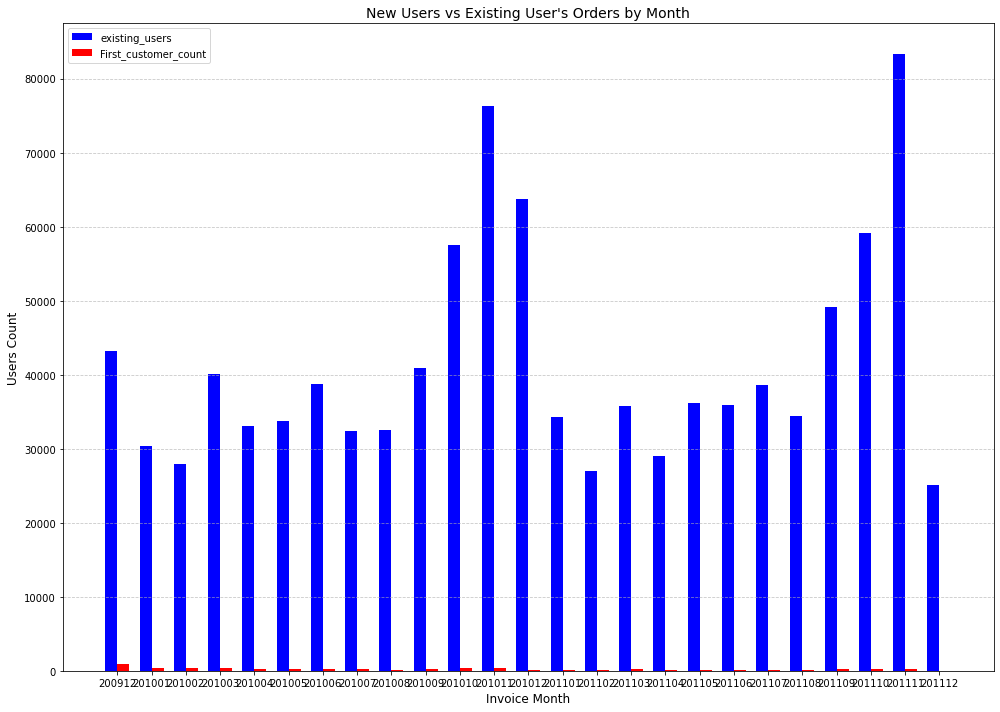

In [168]:
# Plot the data
plt.figure(figsize=(14, 10))

x = merged_user_df["invoice_month"]
bar_width = 0.35  # Width of the bars
indices = range(len(x))
print(merged_df.head())
# Plot placed and cancelled counts
plt.bar(indices, merged_user_df["existing_users"], width=bar_width, label="existing_users", color="blue")
plt.bar([i + bar_width for i in indices], merged_user_df["First_customer_count"], width=bar_width, label="First_customer_count", color="red")

plt.xlabel("Invoice Month", fontsize=12)
plt.ylabel("Users Count", fontsize=12)
plt.title("New Users vs Existing User's Orders by Month", fontsize=14)
plt.xticks([i + bar_width / 2 for i in indices], x, fontsize=10)  # Set x-tick labels at center
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Assuming `filtered_retail_df` is already available and 'invoice_date' is datetime
# Step 1: Preprocess Data

# Convert invoice_date to datetime if it's not
filtered_retail_df['invoice_date'] = pd.to_datetime(filtered_retail_df['invoice_date'])

# Calculate the recency: How recently did the customer make a purchase?
# Assuming that today's date is the most recent date in the dataset
current_date = filtered_retail_df['invoice_date'].max()
filtered_retail_df['Recency'] = (current_date - filtered_retail_df['invoice_date']).dt.days
#print(current_date)
#print(filtered_retail_df[['invoice_date', 'Recency']])
# Step 2: Calculate Frequency: How often did the customer make a purchase?
# Count the number of purchases per customer
frequency_df = filtered_retail_df.groupby('customer_id').size().reset_index(name='Frequency')
print(frequency_df)
# Step 3: Calculate Monetary Value: How much did the customer spend?
# Calculate total spending per customer
filtered_retail_df['Total_Spend'] = filtered_retail_df['quantity'] * filtered_retail_df['unit_price']
monetary_df = filtered_retail_df.groupby('customer_id')['Total_Spend'].sum().reset_index(name='Monetary')

# Step 4: Merge all RFM data into one DataFrame
rfm_df = frequency_df.merge(monetary_df, on='customer_id').merge(
    filtered_retail_df[['customer_id', 'Recency']].drop_duplicates(), on='customer_id'
)

# Step 5: RFM Segmentation - Apply scoring to each of the RFM dimensions
# Define quantiles for each RFM component (optional, you can adjust these thresholds)
quantiles = rfm_df.quantile(q=[0.25, 0.5, 0.75])

# Score each customer based on Recency, Frequency, and Monetary
def rfm_score(row):
    recency_score = 1 if row['Recency'] <= quantiles.loc[0.25, 'Recency'] else (
        2 if row['Recency'] <= quantiles.loc[0.5, 'Recency'] else 3
    )
    frequency_score = 1 if row['Frequency'] <= quantiles.loc[0.25, 'Frequency'] else (
        2 if row['Frequency'] <= quantiles.loc[0.5, 'Frequency'] else 3
    )
    monetary_score = 1 if row['Monetary'] <= quantiles.loc[0.25, 'Monetary'] else (
        2 if row['Monetary'] <= quantiles.loc[0.5, 'Monetary'] else 3
    )
    return pd.Series([recency_score, frequency_score, monetary_score], index=['Recency_Score', 'Frequency_Score', 'Monetary_Score'])

rfm_df[['Recency_Score', 'Frequency_Score', 'Monetary_Score']] = rfm_df.apply(rfm_score, axis=1)

# Step 6: Combine RFM scores into a single RFM score (optional)
rfm_df['RFM_Score'] = rfm_df['Recency_Score'] + rfm_df['Frequency_Score'] + rfm_df['Monetary_Score']

# Step 7: Visualize RFM analysis - Plotting histogram of RFM scores
plt.figure(figsize=(12, 8))
plt.hist(rfm_df['RFM_Score'], bins=range(3, 10), color='skyblue', edgecolor='black')
plt.title('Distribution of RFM Scores', fontsize=16)
plt.xlabel('RFM Score', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

# Step 8: Final RFM DataFrame for further analysis or segmentation
print(rfm_df[['customer_id', 'Recency', 'Frequency', 'Monetary', 'RFM_Score']].head())


In [203]:
# Step 9: RFM score values using quantiles
rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Step 10: Combine RFM scores into an aggregate RFM score
rfm_df["RFM_Score"] = (
    rfm_df['RecencyScore'].astype(str) +
    rfm_df['FrequencyScore'].astype(str) +
    rfm_df['MonetaryScore'].astype(str)
)

# Step 11: Segment customers based on Recency and Frequency scores
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

# Generate segments
rfm_df['Segment'] = (
    rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str)
)
rfm_df['Segment'] = rfm_df['Segment'].replace(seg_map, regex=True)

pd.set_option('display.max_columns', 70)
print(rfm_df.head())


   customer_id  Frequency  Monetary  Recency  Recency_Score  Frequency_Score  Monetary_Score RFM_Score RecencyScore FrequencyScore MonetaryScore      Segment
0      12346.0         34  77556.46      725              3                1               3       115            1              1             5  Hibernating
1      12346.0         34  77556.46      721              3                1               3       115            1              1             5  Hibernating
2      12346.0         34  77556.46      704              3                1               3       115            1              1             5  Hibernating
3      12346.0         34  77556.46      693              3                1               3       115            1              1             5  Hibernating
4      12346.0         34  77556.46      685              3                1               3       115            1              1             5  Hibernating
